<a href="https://colab.research.google.com/github/soumyasahaiitb/wids_project-repo/blob/master/soumya_saha_WiDS_Project_UID_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Absolute Error: 0.0900918181644379
Mean squared error: 0.016342330337644494
R2 Score: 0.3347951735370507


Text(0.5, 0, 'Actual Solubility')

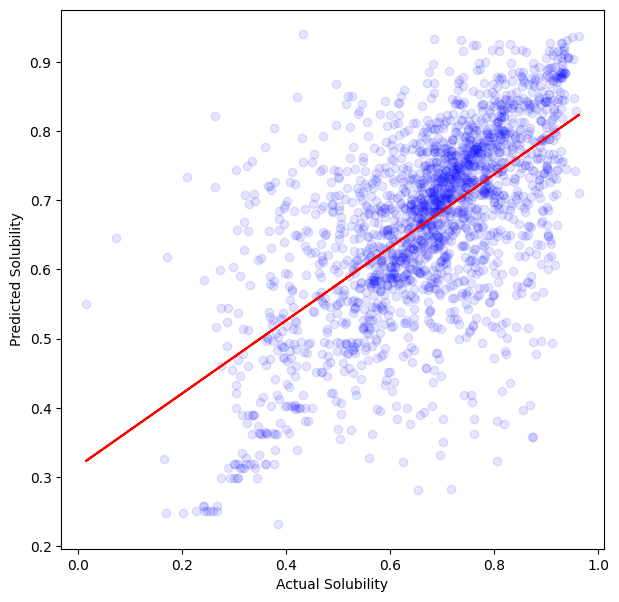

In [7]:
# Importing of libraries and modules
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from rdkit import Chem
from rdkit.Chem import Descriptors
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

# Ignoring all the warnings so that no warning is shown in the output
import os
import sys
sys.stderr = open(os.devnull, 'w')
sys.stderr = sys.__stderr__

# Reading and displaying the csv file of solubility
df = pd.read_csv("https://raw.githubusercontent.com/soumyasahaiitb/wids_project-repo/master/WiDS%20project%20solubility%20.csv")
df.drop("Unnamed: 11", axis =1)

# Preprocessing and normalization
def df_normalize(df, i = 3):
  min_max_scaler = preprocessing.MinMaxScaler()
  df.iloc[:,i:] = min_max_scaler.fit_transform(df.iloc[:,i:].T).T
df_normalize(df)
scaler = MinMaxScaler()
df['log S'] = scaler.fit_transform(df[['log S']])

# Adding molecular descriptors
smiles_col = 'SMILES'
target_col = 'log S'
df[smiles_col] = df[smiles_col].astype(str)
df['MOLECULAR WEIGHT'] = df[smiles_col].apply(lambda x: Descriptors.MolWt(Chem.MolFromSmiles(x)) if x is not None else None)
df['logP'] = df[smiles_col].apply(lambda x: Descriptors.MolLogP(Chem.MolFromSmiles(x)) if x is not None else None)
df['TPSA'] = df[smiles_col].apply(lambda x: Descriptors.TPSA(Chem.MolFromSmiles(x)) if x is not None else None)
df['NUMBER OF H ACCEPTORS'] = df[smiles_col].apply(lambda x: Descriptors.NumHAcceptors(Chem.MolFromSmiles(x)) if x is not None else None)
df['NUMBER OF H DONORS'] = df[smiles_col].apply(lambda x: Descriptors.NumHDonors(Chem.MolFromSmiles(x)) if x is not None else None)
df['NUMBER OF ROTATABLE BONDS'] = df[smiles_col].apply(lambda x: Descriptors.NumRotatableBonds(Chem.MolFromSmiles(x)) if x is not None else None)
df['NUMBER OF VALENCE ELECTRONS'] = df[smiles_col].apply(lambda x: Descriptors.NumValenceElectrons(Chem.MolFromSmiles(x)) if x is not None else None)
df['NUMBER OF AROMATIC RINGS'] = df[smiles_col].apply(lambda x: Descriptors.NumAromaticRings(Chem.MolFromSmiles(x)) if x is not None else None)
df.dropna(subset=[target_col], inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[["MOLECULAR WEIGHT"]], df[target_col], test_size=0.2, random_state=100)

# Initialize the model
model = RandomForestRegressor(n_estimators=200, random_state=100)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f"Mean squared error: {mse}")
print(f"R2 Score: {r2}")

# Plotting the graph between predicted solubility and actual solubility
plt.figure(figsize=(7,7))
plt.scatter(x=y_test,y=y_pred,c="blue", alpha =0.1 )
z = np.polyfit(y_test,y_pred,1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),c="Red")
plt.ylabel("Predicted Solubility")
plt.xlabel("Actual Solubility")












In [2]:
pip install rdkit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 22.4 MB/s eta 0:00:00
